# Keras MNIST


* Atividade PEL219 - Keras MNIST - Gabriel Melo. Matrícula: 125.304-6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

2025-11-17 19:45:16.610783: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 19:45:16.930159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 19:45:18.519851: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

In [3]:

y_train = to_categorical(y_train)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000,))

In [5]:
model = Sequential() 
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1280, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))  # digit numbers
model.compile('adam', 'categorical_crossentropy', metrics=['categorical_accuracy'])

/home/melo/coding/machine-learning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-17 19:45:19.120099: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1280)           │     1,004,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,017,610 (3.88 MB)

 Trainable params: 1,017,610 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x=x_train, y=y_train, epochs=10, validation_split=.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.8953 - loss: 0.3530 - val_categorical_accuracy: 0.9502 - val_loss: 0.1788
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9454 - loss: 0.1820 - val_categorical_accuracy: 0.9620 - val_loss: 0.1352
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9656 - loss: 0.1129 - val_categorical_accuracy: 0.9752 - val_loss: 0.0879
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9767 - loss: 0.0777 - val_categorical_accuracy: 0.9762 - val_loss: 0.0844
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9832 - loss: 0.0546 - val_categorical_accuracy: 0.9795 - val_loss: 0.0728
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9878 - loss: 0.0387 - val_categorical_accuracy: 0.9808 - val_loss: 0.0677
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy

## Testing

In [8]:
results = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
results_class = np.argmax(results, axis=1)

In [10]:
accuracy_score(results_class, y_test), precision_score(results_class, y_test, average="weighted"), recall_score(results_class, y_test, average="weighted"), f1_score(results_class, y_test, average="weighted")

(0.9795, 0.9796001132565194, 0.9795, 0.9794996470662685)

In [11]:
print(classification_report(y_test, results_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

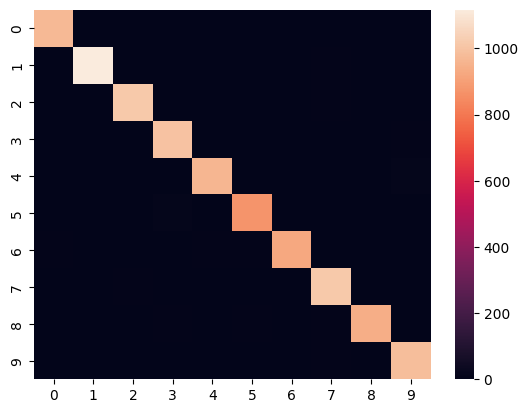

In [12]:
sns.heatmap(confusion_matrix(y_test, results_class))

## Training data

In [13]:
df = pd.DataFrame(history.history)

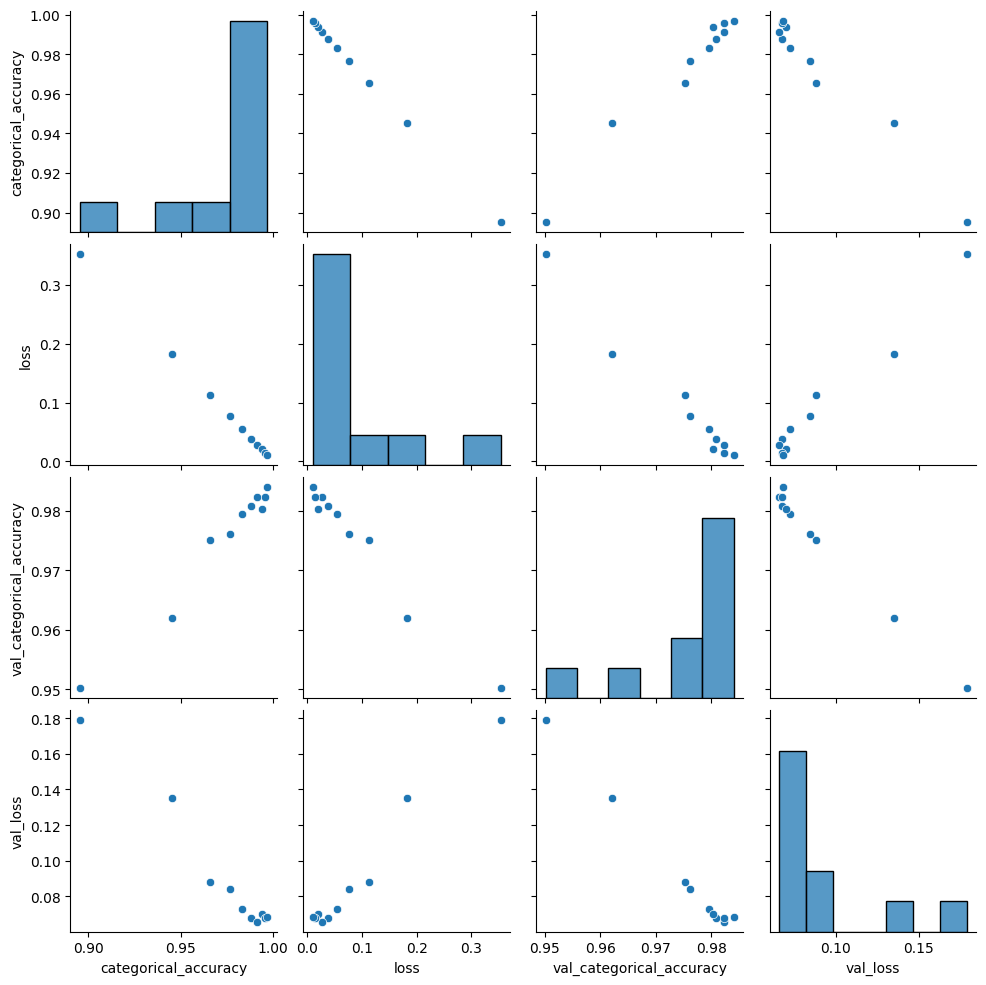

In [14]:
sns.pairplot(df)

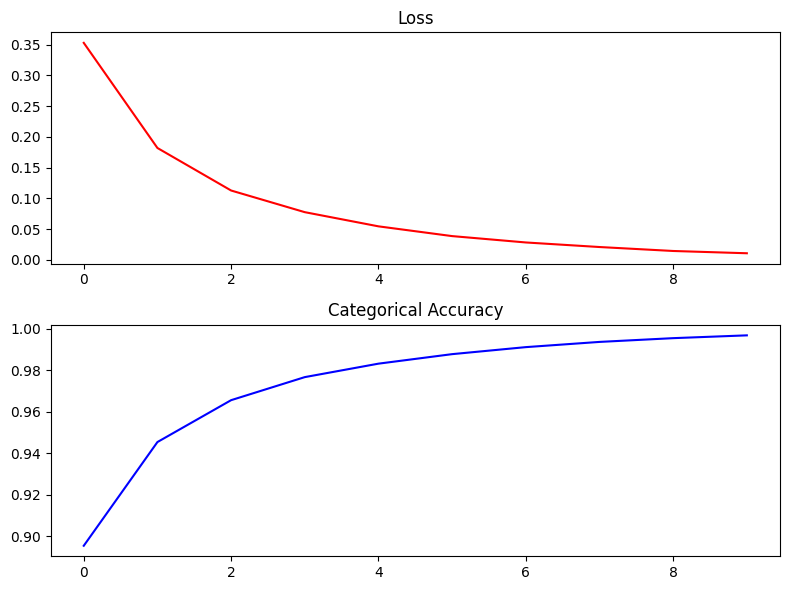

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

ax[0].plot(df['loss'], color='red')
ax[0].set_title("Loss")

ax[1].plot(df['categorical_accuracy'], color='blue')
ax[1].set_title("Categorical Accuracy")

fig.tight_layout()